In [1]:
# Import pacakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [15, 9]

In [2]:
# Where the data comes from
# Country Codes with Continent https://gist.github.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c 
# Minimized Data 1960-2050 https://databank.worldbank.org/reports.aspx?source=Health%20Nutrition%20and%20Population%20Statistics%3A%20Population%20estimates%20and%20projections
#     Here all countries and times were selected however when considering the series
#     we removed the % based data of the population for males and females. This is due
#     to the download limitations of the csv file cells on their website.

In [3]:
# The multiple mark down cells below have been archived as running it is time consuming and all it outputs
# is the csv file containing the data we will use. 
#
# Be aware the file we use will be a mix of two csv files that of continents codes and country data

In [4]:
#data_1960_2050 = pd.read_csv('./Datasets/Minimized Data 1960-2050.csv', low_memory=False)
#CCwC = pd.read_csv('./Datasets/Country Codes with Continent.csv', low_memory=False)
#
#data_1960_2050.insert(0, "Continent_Name", np.nan)
#data_1960_2050.insert(0, "Continent_Code", np.nan)
#data_1960_2050.insert(0, "Country_Number", np.nan)

In [5]:
#i = 1960
#string = ["Continent_Name", "Continent_Code", "Country_Number", "Country_Name", "Country_Code", "Series_Name", "Series_Code"]
#while i != 2051:
#    temp = "[" + str(i) + "]"
#    string.append(temp)
#    i = i + 1
#    
#data_1960_2050.columns = string

In [6]:
#for x in range(len(data_1960_2050)):
#    i = 90 # Length of Data set per country
#    for y in range(len(CCwC)):
#        if(data_1960_2050.loc[x, "Country_Code"] == CCwC.loc[y, "Three_Letter_Country_Code"]):
#            if(i != 0):
#                data_1960_2050.loc[x, "Continent_Name"] = CCwC.loc[y, "Continent_Name"]
#                data_1960_2050.loc[x, "Continent_Code"] = CCwC.loc[y, "Continent_Code"]
#                data_1960_2050.loc[x, "Country_Number"] = CCwC.loc[y, "Country_Number"]
#                i = i - 1

In [7]:
#data_1960_2050.to_csv('./Datasets/Population Data 1960-2050.csv', na_rep='NA') 

In [8]:
pop_data = pd.read_csv('./Datasets/Population Data 1960-2050.csv', low_memory=False)
pop_data = pop_data.replace('..', np.nan)
pop_data = pop_data.iloc[: , 1:] # Remove unnecessary column

In [9]:
pop_data.head(15)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
0,Asia,AS,4.0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.617265593364,82.6886781269233,83.2893702677964,83.6040745667416,83.8538402296331,84.1305132205961,85.337606639107,86.3875817780626,87.2881796110479,88.004333820123,88.5257734411341,89.7775513950377,90.711207917884,91.3786718889649,91.8030471642632,91.9457639589236,92.9888574822643,93.858398071556,94.5105001444847,94.8159236718955,94.6074368846258,95.7623085653002,96.7238143522287,97.5152373392122,98.2848562519578,99.2641805972282,100.037992327902,100.318450831989,100.419936268638,100.852511182472,102.186695822177,101.855829678157,101.572891363737,101.497709604882,101.361665767309,100.751043096938,101.779455410549,102.821757539625,103.650785887861,104.275818919765,104.856398128094,104.476104431144,103.671182514941,102.663237607573,101.562370593157,100.349127298896,100.970943099336,101.600182463114,102.078658552986,102.249014354329,102.04582265028,100.224460810072,97.9259472109872,95.3387363003889,92.6491430408227,89.9540923341871,87.9417880743028,86.0007546392816,84.0776554602003,82.1097716001822,80.0882594983951,78.2140686091963,76.2873365602917,74.3682121084769,72.5347069038439,70.818707027286,69.2728455912696,67.811842050991,66.4260053997555,65.0929735927391,63.7996513768842,62.5877916751458,61.4162866626515,60.2818752139422,59.182682333386,58.1177761443717,57.1344740085998,56.1750226260573,55.244749483167,54.3515082631579,53.4987319337544,52.721641363705,51.9732864237122,51.2542813990082,50.5649528551787,49.905272496857,49.3091701493759,48.7358507892608,48.1851513162138,47.6569146420521,47.1525182056463
1,Asia,AS,4.0,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.08221355458813,5.13013875077877,5.1396410434319,5.11552596472367,5.06374943823744,4.98789855835,5.03818379040036,5.06247965853582,5.05905695854066,5.02527774105666,4.961263617462,5.00108321936102,5.01085032694929,4.99403609195624,4.95524993193465,4.8973899858217,4.93733610490956,4.94207927072837,4.91061339949012,4.84265971718334,4.73821354846004,4.80156958470389,4.81353830554338,4.76677564527408,4.65322466391202,4.46231971723597,4.54375628731268,4.59678804497462,4.61522776578655,4.59004259086774,4.51390235010915,4.52627613429353,4.55426302653287,4.6010207759227,4.66732341775973,4.7544225968921,4.78092518838318,4.78444369236508,4.76853617345827,4.73774444597141,4.69519414570861,4.64542399494426,4.5945113217023,4.5460364961842,4.50174411893789,4.46275357219977,4.52550492386492,4.5776088271441,4.62187756017232,4.66303425585248,4.70389192215768,4.71420886190398,4.72309440866141,4.72760222695028,4.72293656494244,4.7083204539433,4.7359880220469,4.75092727211326,4.75827277828347,4.76361649281109,4.77066404234554,4.79310389873702,4.81304782154357,4.83309464391658,4.85609762171484,4.88431018163558,4.9305392330175,4.97811237221119,5.02799948484703,5.08078716026558,5.13759646227234,5.20953818576817,5.28220675539213,5.35737057386191,5.43651858362534,5.52144418811474,5.62288654428234,5.72570298266211,5.83365888912406,5.95090641922628,6.08042828599966,6.22910451801117,6.38374301415072,6.54627153153927,6.71856043377268,6.90243289671151,7.10386591421077,7.31255821375793,7.5283209975396,7.74944602991995,7.97648707408324
2,Asia,AS,4.0,Afghanistan,AFG,"Age d

In [10]:
non_nation_str = ["Arab World", "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", "Post-demographic dividend", "Sub-Saharan Africa", "Upper middle income","World", "Africa Eastern and Southern", "Africa Western and Central", "Central Europe and the Baltics", "Early-demographic dividend", "East Asia & Pacific", "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)", "Euro area", "Europe & Central Asia", "Europe & Central Asia (excluding high income)", "Europe & Central Asia (IDA & IBRD countries)", "European Union", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)", "Latin America & the Caribbean (IDA & IBRD countries)", "Least developed countries: UN classification", "Low & middle income", "Low income", "Lower middle income", "Middle East & North Africa", "Middle East & North Africa (excluding high income)", "Middle East & North Africa (IDA & IBRD countries)", "Middle income", "Not classified", "OECD members", "Other small states", "Pre-demographic dividend", "Small states", "South Asia", "South Asia (IDA & IBRD)", "Sub-Saharan Africa (excluding high income)", "Sub-Saharan Africa (IDA & IBRD countries)"]
nation_data = pop_data[~pop_data.Country_Name.isin(non_nation_str)]
non_nation_data = pop_data[pop_data.Country_Name.isin(non_nation_str)]
non_nation_data = non_nation_data.iloc[: , 3:] # Removing Continent Codes for non-Nations (Will be NA anyway)

In [11]:
nation_data.head(87)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
0,Asia,AS,4.0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.617265593364,82.6886781269233,83.2893702677964,83.6040745667416,83.8538402296331,84.1305132205961,85.337606639107,86.3875817780626,87.2881796110479,88.004333820123,88.5257734411341,89.7775513950377,90.711207917884,91.3786718889649,91.8030471642632,91.9457639589236,92.9888574822643,93.858398071556,94.5105001444847,94.8159236718955,94.6074368846258,95.7623085653002,96.7238143522287,97.5152373392122,98.2848562519578,99.2641805972282,100.037992327902,100.318450831989,100.419936268638,100.852511182472,102.186695822177,101.855829678157,101.572891363737,101.497709604882,101.361665767309,100.751043096938,101.779455410549,102.821757539625,103.650785887861,104.275818919765,104.856398128094,104.476104431144,103.671182514941,102.663237607573,101.562370593157,100.349127298896,100.970943099336,101.600182463114,102.078658552986,102.249014354329,102.04582265028,100.224460810072,97.9259472109872,95.3387363003889,92.6491430408227,89.9540923341871,87.9417880743028,86.0007546392816,84.0776554602003,82.1097716001822,80.0882594983951,78.2140686091963,76.2873365602917,74.3682121084769,72.5347069038439,70.818707027286,69.2728455912696,67.811842050991,66.4260053997555,65.0929735927391,63.7996513768842,62.5877916751458,61.4162866626515,60.2818752139422,59.182682333386,58.1177761443717,57.1344740085998,56.1750226260573,55.244749483167,54.3515082631579,53.4987319337544,52.721641363705,51.9732864237122,51.2542813990082,50.5649528551787,49.905272496857,49.3091701493759,48.7358507892608,48.1851513162138,47.6569146420521,47.1525182056463
1,Asia,AS,4.0,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.08221355458813,5.13013875077877,5.1396410434319,5.11552596472367,5.06374943823744,4.98789855835,5.03818379040036,5.06247965853582,5.05905695854066,5.02527774105666,4.961263617462,5.00108321936102,5.01085032694929,4.99403609195624,4.95524993193465,4.8973899858217,4.93733610490956,4.94207927072837,4.91061339949012,4.84265971718334,4.73821354846004,4.80156958470389,4.81353830554338,4.76677564527408,4.65322466391202,4.46231971723597,4.54375628731268,4.59678804497462,4.61522776578655,4.59004259086774,4.51390235010915,4.52627613429353,4.55426302653287,4.6010207759227,4.66732341775973,4.7544225968921,4.78092518838318,4.78444369236508,4.76853617345827,4.73774444597141,4.69519414570861,4.64542399494426,4.5945113217023,4.5460364961842,4.50174411893789,4.46275357219977,4.52550492386492,4.5776088271441,4.62187756017232,4.66303425585248,4.70389192215768,4.71420886190398,4.72309440866141,4.72760222695028,4.72293656494244,4.7083204539433,4.7359880220469,4.75092727211326,4.75827277828347,4.76361649281109,4.77066404234554,4.79310389873702,4.81304782154357,4.83309464391658,4.85609762171484,4.88431018163558,4.9305392330175,4.97811237221119,5.02799948484703,5.08078716026558,5.13759646227234,5.20953818576817,5.28220675539213,5.35737057386191,5.43651858362534,5.52144418811474,5.62288654428234,5.72570298266211,5.83365888912406,5.95090641922628,6.08042828599966,6.22910451801117,6.38374301415072,6.54627153153927,6.71856043377268,6.90243289671151,7.10386591421077,7.31255821375793,7.5283209975396,7.74944602991995,7.97648707408324
2,Asia,AS,4.0,Afghanistan,AFG,"Age d

In [12]:
non_nation_data.head(15)

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
630,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.06112205164,89.4895108163163,90.7824558771063,91.8989500408246,92.7280061443775,93.2012930138842,94.087532755907,94.4859240488432,94.544615403454,94.4342534394932,94.2266643745616,94.5232110266817,94.5916608051277,94.4822953645836,94.2471390363775,93.9376995597172,93.803986457377,93.5599438081628,93.2248262893934,92.7926339727742,92.2575196188023,91.9656578546825,91.5350620214575,90.9953682327702,90.3831316021733,89.7191273477264,89.4438357883841,89.0285578821035,88.5170660482334,87.9145337739656,87.3320530013089,86.5101699445605,85.8304438692499,84.704228399562,83.4326220453293,81.8208504077921,80.5449266915477,79.1986694279309,77.8170131435407,76.4227835668322,75.0173343309576,73.6057527561146,72.18209603725,70.7701237028073,69.4003537532049,68.0988262244385,66.9023290826331,65.7843056315348,64.7785025338816,63.9138327800629,63.2016211242295,62.5723284619495,62.0893243343428,61.7307948697144,61.4465810422326,61.1953066707489,61.283403446682,61.2533630506395,61.1645819704013,61.0818013387275,61.019962983148,60.829896452621,60.681146097193,60.5174999070387,60.250999776366,59.843405894957,59.4079889376226,58.8468742570022,58.2040910558717,57.5575364885441,56.9548343270482,56.4431811186312,55.9599005399144,55.5207923355043,55.1303437406016,54.7932919427895,54.5737306162385,54.3882405917174,54.2524628643581,54.1768445958267,54.1635290280346,54.2441783119108,54.3563323234361,54.5022218543154,54.6771558210053,54.8749650103232,55.1035089860824,55.3336141517315,55.5643422212161,55.7915346893762,56.0120656305736
631,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.59195408307987,6.70090074366887,6.79327971905438,6.86732593028292,6.91922151681126,6.94779074720844,7.01559082118739,7.05347127100655,7.07011677104574,7.07506501358867,7.07355966713691,7.11832725337112,7.14820987382225,7.16107292512336,7.15334083385924,7.12560208428215,7.11348093859674,7.0810216954807,7.03508639642727,6.98255604877118,6.92803253513746,6.90401956955471,6.87098116094258,6.8328328012533,6.79374040302333,6.7571436478586,6.75894075266777,6.7590096996625,6.76125834506832,6.76789629532067,6.75897576068469,6.79859452328479,6.88014284963391,6.90718743531979,6.93127370540459,6.91586520022699,6.94686757653477,6.9680003972479,6.98180699985983,6.9881164011666,6.9871194426484,6.9756676140615,6.9563601413223,6.92934736758178,6.8929686599926,6.84875837740397,6.80875900444734,6.75955726571105,6.71179791817589,6.67681857378858,6.66162414181123,6.66872911565331,6.68688531042261,6.72070535687589,6.77649938032406,6.85818707211253,6.98148098233184,7.12144985748971,7.27380192381238,7.43200320011483,7.59307165027408,7.77289869524465,7.95267533539854,8.13659435390806,8.32926012411065,8.53382871398852,8.75551407067243,8.97983853102697,9.2095792383192,9.44735372419912,9.69598982239725,9.94965637050367,10.2079923767089,10.474438001793,10.751464414661,11.0415061891482,11.3312952272521,11.6270485883368,11.9354928378102,12.2641564528881,12.6176097465762,12.9750648954027,13.3475510934054,13.734951831815,14.1351286360119,14.5470057281549,14.9489352712508,15.3520425351572,15.7588941463234,16.1719816705628,16.5930502916949
632,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.3241959797136,82.6261975934145,83.78

In [13]:
pop_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL"] #Population Totals
pop_growth = nation_data[nation_data.Series_Code == "SP.POP.GROW"] #Population Growth
pop_migration = nation_data[nation_data.Series_Code == "SM.POP.NETM"] #Net Migration

world_total = non_nation_data[non_nation_data.Series_Code == "SP.POP.TOTL"]
world_total = world_total[world_total.Country_Code == "WLD"]

world_growth = non_nation_data[non_nation_data.Series_Code == "SP.POP.GROW"]
world_growth = world_growth[world_growth.Country_Code == "WLD"]

male_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL.MA.IN"] #Male Population
female_totals = nation_data[nation_data.Series_Code == "SP.POP.TOTL.FE.IN"] #Female Population
rural_totals = nation_data[nation_data.Series_Code == "SP.RUR.TOTL"] #Rural Population Total
urban_totals = nation_data[nation_data.Series_Code == "SP.URB.TOTL"] #Urban Population Total

In [14]:
pop_totals.head(15)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
62,Asia,AS,4.0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,10174840,10399936,10637064,10893772,11173654,11475450,11791222,12108963,12412960,12689164,12943093,13171294,13341199,13411060,13356500,13171679,12882518,12537732,12204306,11938204,11736177,11604538,11618008,11868873,12412311,13299016,14485543,15816601,17075728,18110662,18853444,19357126,19737770,20170847,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000,40754000,41681000,42609000,43532000,44449000,45364000,46275000,47185000,48094000,49000000,49904000,50804000,51699000,52587000,53469000,54343000,55209000,56065000,56912000,57748000,58574000,59387000,60188000,60974000,61746000,62503000,63245000,63972000,64683000
152,Europe,EU,8.0,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,2081695,2135479,2187853,2243126,2296752,2350124,2404831,2458526,2513546,2566266,2617832,2671997,2726056,2784278,2843960,2904429,2964762,3022635,3083605,3142336,3227943,3286542,3266790,3247039,3227287,3207536,3187784,3168033,3148281,3128530,3108778,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000,2824000,2816000,2807000,2798000,2789000,2779000,2769000,2759000,2748000,2736000,2724000,2711000,2696000,2681000,2665000,2647000,2629000,2610000,2591000,2571000,2550000,2529000,2508000,2486000,2465000,2443000,2421000,2399000,2377000
242,Africa,AF,12.0,Algeria,DZA,"Population, total",SP.POP.TOTL,11057864,11336336,11619828,11912800,12221675,12550880,12902626,13275020,13663581,14061724,14464992,14872253,15285992,15709831,16149018,16607706,17085799,17582899,18102266,18647801,19221659,19824297,20452901,21101875,21763578,22431507,23102386,23774287,24443472,25106192,25758872,26400468,27028330,27635517,28213777,28757788,29266415,29742980,30192750,30623406,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44617000,45350000,46053000,46731000,47388000,48022000,48634000,49226000,49801000,50361000,50908000,51444000,51971000,52494000,53016000,53537000,54059000,54583000,55110000,55640000,56174000,56711000,57250000,57789000,58326000,58859000,59388000,59911000,60423000,60923000
332,Oceania,OC,16.0,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127,20605,21246,22029,22850,23675,24473,25235,25980,26698,27362,27982,28564,29103,29595,30045,30455,30834,31262,31842,32648,33697,34969,36413,37946,39521,41114,42741,44346,45894,47351,48682,49900,51025,52099,53158,54209,55227,56180,57049,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806,55739,55617,55461,55312,55197,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,55000,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000
422,Europe,EU,20.0,Andorra,AND,"Population, total",SP.POP.TOTL,13410,14378,15379,16407,17466,18542,196

In [15]:
world_total.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
20582,World,WLD,"Population, total",SP.POP.TOTL,3032156070,3071596055,3124561005,3189655687,3255145692,3322046795,3392097729,3461619724,3532782993,3606553753,3681975908,3760516757,3836900801,3912984371,3988487336,4062507027,4135432265,4207786422,4281339378,4356778367,4432963653,4511164132,4592387213,4674330282,4755996689,4839176734,4924747934,5012556248,5101287675,5189977062,5280046096,5368139468,5452576447,5537885552,5622085788,5706753900,5789655609,5872286683,5954005906,6034491620,6114332517,6193671694,6272753009,6351882385,6431551721,6511748273,6592734559,6674203697,6757020825,6839574233,6921877071,7002880914,7085790438,7169675197,7254292848,7339076654,7424484741,7509410228,7592475615,7673345391,7752840547,7831742000,7910003000,7987314000,8063642000,8138971000,8213276000,8286546000,8358787000,8429999000,8500190000,8569347000,8637443000,8704424000,8770284000,8835051000,8898735000,8961396000,9023031000,9083646000,9143220000,9201714000,9259081000,9315314000,9370366000,9424214000,9476828000,9528225000,9578391000,9627322000,9674665000


In [16]:
world_growth.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
20577,World,WLD,Population growth (annual %),SP.POP.GROW,NaN,1.30072410817561,1.7243462047616,2.08332248580949,2.05319982551457,2.05524143402917,2.10866788828604,2.04952806653054,2.0557795099968,2.08817694565934,2.09125276275897,2.13311686340344,2.03121137162374,1.98294336877748,1.92954936287425,1.8558336723775,1.79507967654773,1.74961533313858,1.74802018504161,1.7620417897177,1.74866104222924,1.76406767844979,1.80049048590014,1.78432403887979,1.74712530080474,1.74895086012958,1.76830078138659,1.78300118456379,1.77018316822685,1.73856862522462,1.73544185116863,1.66842050994094,1.57292819054604,1.56456504240188,1.52044016094899,1.50599110708553,1.45269465711498,1.427219157415,1.39160819986147,1.35179096679923,1.32307577883421,1.2975934295266,1.27680831188725,1.26147763010064,1.25426340053367,1.24692384480321,1.24369497414078,1.23574121285958,1.24085406678891,1.22174269013,1.20333276891564,1.17025832977265,1.18393451235548,1.18384476275419,1.18021596062547,1.16873977624677,1.16374431044332,1.14385698082209,1.10615060940842,1.06513053318513,1.03599084817998,1.01771025112249,0.999279598332009,0.977382688729705,0.955615367068319,0.934180857731533,0.912953246792497,0.892092266228488,0.871786628590485,0.851941794903979,0.832633550727579,0.81359357849648,0.794646313190484,0.775472555940453,0.756626745204514,0.738482357013751,0.720810779700074,0.704156264907311,0.687783465879647,0.67178091264455,0.655837975191915,0.639752734813342,0.62343819857908,0.60732809228044,0.59098383586425,0.57466271861739,0.558285285117677,0.542343915073687,0.526498901946582,0.510847803143562,0.491756689970487


In [17]:
print(pop_totals.Country_Name.tolist()) # Someone should double check I have not included an accidental non-country

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The

In [18]:
print(pop_data.dtypes)

Continent_Name     object
Continent_Code     object
Country_Number    float64
Country_Name       object
Country_Code       object
                   ...   
[2046]             object
[2047]             object
[2048]             object
[2049]             object
[2050]             object
Length: 98, dtype: object


In [19]:
def preparePlot(dataframe): #We can use this method to plot individual plots (Can be expanded to be more automated)
    string = dataframe['Country_Name'].tolist()
    dataframe = dataframe.T
    dataframe = dataframe.iloc[8:]
    dataframe = dataframe.astype('float64')
    dataframe.columns = string
    return dataframe

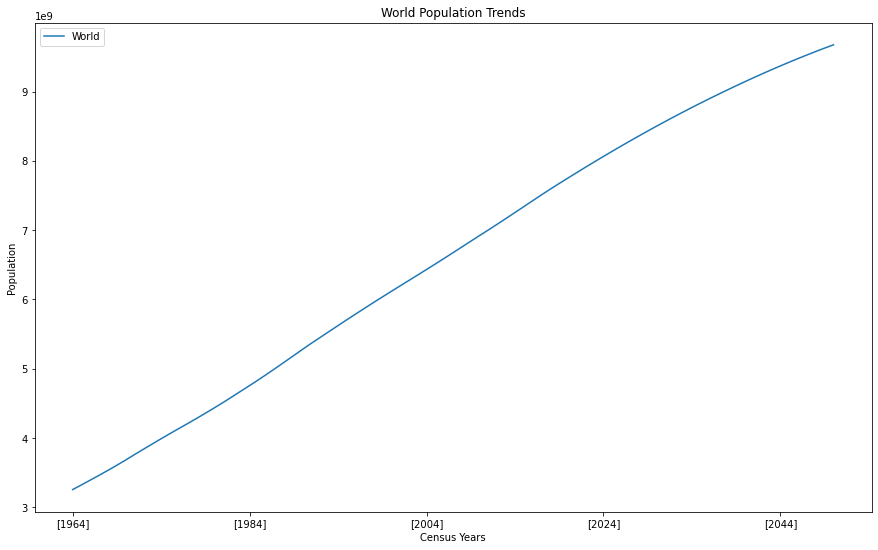

In [20]:
world_total_plot = preparePlot(world_total)
world_total_plot.plot(title = "World Population Trends")
plt.ylabel("Population")
plt.xlabel("Census Years")
plt.legend(["World"])

In [21]:
world_growth.head()

,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
20577,World,WLD,Population growth (annual %),SP.POP.GROW,NaN,1.30072410817561,1.7243462047616,2.08332248580949,2.05319982551457,2.05524143402917,2.10866788828604,2.04952806653054,2.0557795099968,2.08817694565934,2.09125276275897,2.13311686340344,2.03121137162374,1.98294336877748,1.92954936287425,1.8558336723775,1.79507967654773,1.74961533313858,1.74802018504161,1.7620417897177,1.74866104222924,1.76406767844979,1.80049048590014,1.78432403887979,1.74712530080474,1.74895086012958,1.76830078138659,1.78300118456379,1.77018316822685,1.73856862522462,1.73544185116863,1.66842050994094,1.57292819054604,1.56456504240188,1.52044016094899,1.50599110708553,1.45269465711498,1.427219157415,1.39160819986147,1.35179096679923,1.32307577883421,1.2975934295266,1.27680831188725,1.26147763010064,1.25426340053367,1.24692384480321,1.24369497414078,1.23574121285958,1.24085406678891,1.22174269013,1.20333276891564,1.17025832977265,1.18393451235548,1.18384476275419,1.18021596062547,1.16873977624677,1.16374431044332,1.14385698082209,1.10615060940842,1.06513053318513,1.03599084817998,1.01771025112249,0.999279598332009,0.977382688729705,0.955615367068319,0.934180857731533,0.912953246792497,0.892092266228488,0.871786628590485,0.851941794903979,0.832633550727579,0.81359357849648,0.794646313190484,0.775472555940453,0.756626745204514,0.738482357013751,0.720810779700074,0.704156264907311,0.687783465879647,0.67178091264455,0.655837975191915,0.639752734813342,0.62343819857908,0.60732809228044,0.59098383586425,0.57466271861739,0.558285285117677,0.542343915073687,0.526498901946582,0.510847803143562,0.491756689970487


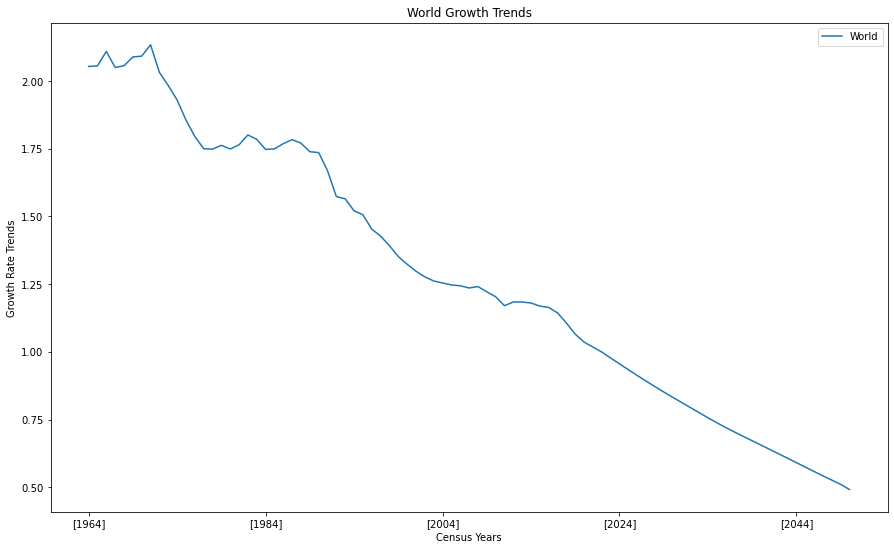

In [22]:
world_growth_plot = preparePlot(world_growth)
world_growth_plot.plot(title = "World Growth Trends")
plt.ylabel("Growth Rate Trends")
plt.xlabel("Census Years")
plt.legend(["World"])

In [23]:
pop_migration.head(15)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
3,Asia,AS,4.0,Afghanistan,AFG,Net migration,SM.POP.NETM,NaN,NaN,-20000,NaN,NaN,NaN,NaN,-20000,NaN,NaN,NaN,NaN,-20000,NaN,NaN,NaN,NaN,-1153959,NaN,NaN,NaN,NaN,-3345095,NaN,NaN,NaN,NaN,-1525351,NaN,NaN,NaN,NaN,3076383,NaN,NaN,NaN,NaN,-867540,NaN,NaN,NaN,NaN,744193,NaN,NaN,NaN,NaN,-1046361,NaN,NaN,NaN,NaN,521769,NaN,NaN,NaN,NaN,-314602,NaN,NaN,NaN,NaN,-300000,NaN,NaN,NaN,NaN,-330092,NaN,NaN,NaN,NaN,-311796,NaN,NaN,NaN,NaN,-311802,NaN,NaN,NaN,NaN,-311082,NaN,NaN,NaN,NaN,-310076,NaN,NaN,NaN
93,Europe,EU,8.0,Albania,ALB,Net migration,SM.POP.NETM,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-99,NaN,NaN,NaN,NaN,-443212,NaN,NaN,NaN,NaN,-179606,NaN,NaN,NaN,NaN,-176774,NaN,NaN,NaN,NaN,-217358,NaN,NaN,NaN,NaN,-136590,NaN,NaN,NaN,NaN,-69998,NaN,NaN,NaN,NaN,-69998,NaN,NaN,NaN,NaN,-55000,NaN,NaN,NaN,NaN,-40000,NaN,NaN,NaN,NaN,-40000,NaN,NaN,NaN,NaN,-40000,NaN,NaN,NaN,NaN,-40000,NaN,NaN,NaN
183,Africa,AF,12.0,Algeria,DZA,Net migration,SM.POP.NETM,NaN,NaN,-282941,NaN,NaN,NaN,NaN,-121335,NaN,NaN,NaN,NaN,-253436,NaN,NaN,NaN,NaN,-224833,NaN,NaN,NaN,NaN,-81020,NaN,NaN,NaN,NaN,-93302,NaN,NaN,NaN,NaN,-128679,NaN,NaN,NaN,NaN,-164413,NaN,NaN,NaN,NaN,-205228,NaN,NaN,NaN,NaN,-357340,NaN,NaN,NaN,NaN,-143268,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN,NaN,-50002,NaN,NaN,NaN
273,Oceania,OC,16.0,American Samoa,ASM,Net migration,SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Europe,EU,20.0,Andorra,AND,Net migration,SM.POP.NETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,Africa,AF,24.0,Angola,AGO,Net migration,SM.POP.NETM,NaN,NaN,-296717,NaN,NaN,NaN,NaN,-587286,NaN,NaN,NaN,NaN,199800,NaN,NaN,NaN,NaN,199800,NaN,NaN,NaN,NaN,234148,NaN,NaN,NaN,NaN,188491,NaN,NaN,NaN,NaN,142812,NaN,NaN,NaN,NaN,199800,NaN,NaN,NaN,NaN,261100,NaN,NaN,NaN,NaN,357301,NaN,NaN,NaN,NaN,166267,NaN,NaN,NaN,NaN,32066,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,-5002,NaN,NaN,NaN,NaN,-5002,NaN,NaN,NaN,NaN,-4997,NaN,NaN,NaN,NaN,-4998,NaN,NaN,NaN,NaN,-5000,NaN,NaN,NaN
543,North America,NaN,28.0,Antigua and Barbuda,ATG,Net migration,SM.POP.NETM,NaN,NaN,-1880,NaN,NaN,NaN,NaN,-1202,NaN,NaN,NaN,NaN,-7018,NaN,NaN,NaN,NaN,-4428,NaN,NaN,NaN,NaN,-3763,NaN,NaN,NaN,NaN,-2890,NaN,NaN,NaN,NaN,2231,NaN,NaN,NaN,NaN,2469,NaN,NaN,NaN,NaN,252,NaN,NaN,NaN,NaN,1887,NaN,NaN,NaN,NaN,943,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
723,South America,SA,32.0,Argentina,ARG,Net migration,SM.POP.NETM,NaN,NaN,1

Text(0.5, 1.0, 'Net Migration by Year')

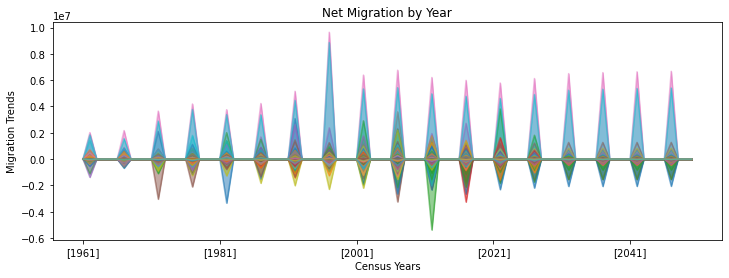

In [24]:
migration_plot = preparePlot(pop_migration)
fig, axs = plt.subplots(figsize=(12, 4))  
migration_plot.plot.area(ax = axs, stacked = False)
axs.get_legend().remove()
axs.set_xlabel("Census Years")
axs.set_ylabel("Migration Trends")
axs.set_title("Net Migration by Year")

In [25]:
# We can cut off the data from some year and attempt to predict the remaining data?
# Can we develop a column for What continent they are on using their country code.

In [26]:
pop_growth.head(20)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040],[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
57,Asia,AS,4.0,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.89849871864013,1.96580482827753,2.02983029774638,2.09020770865721,2.14763884614552,2.17106818556713,2.18816458929405,2.25448537032307,2.38467438052838,2.53674360272129,2.66512850460028,2.71453854729245,2.65905658521727,2.47951659114535,2.20073128110818,1.98138858740406,1.74774777496605,1.2817151973175,0.522282314962146,-0.407658191922243,-1.3934163397202,-2.21977958780843,-2.71285408602014,-2.69538173169936,-2.2045162396444,-1.70675553634083,-1.12798940191383,0.116007964937545,2.13629507171115,4.47695437953718,6.90012448590171,8.54610700459867,8.790896706627,7.65979553393712,5.88427856371589,4.0194777158615,2.63650176396731,1.9473438616857,2.17042851112236,2.97505722281038,3.90280496415438,4.4967187466326,4.66834379545461,4.32155951673842,3.68269988149014,2.9905238360968,2.49383039084495,2.26827304079294,2.39697830237036,2.74661463795293,3.14310555651301,3.40760003260595,3.49459192739625,3.35560233082199,3.07705362914441,2.77803478841236,2.54783303994568,2.38430907940751,2.31307334941778,2.30381209309418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Europe,EU,8.0,Albania,ALB,Population growth (annual %),SP.POP.GROW,NaN,3.12085537059054,3.05673050279088,2.95374876199632,2.88068642624326,2.75402123804227,2.63456387954101,2.63019034549493,2.84251071048949,2.8960833877323,2.55085117829323,2.4229720170788,2.49497310670312,2.36255222384825,2.29721417566909,2.3011538096943,2.20823525497527,2.21325217885547,2.07574189532527,1.98945701957156,2.04796386136191,2.00297430640894,2.11327178253342,2.12088533357751,2.10393661802013,2.05599460887143,1.93322081083734,1.99703995612751,1.88671052887888,2.68786198874035,1.79908559333186,-0.602809679480026,-0.606434726201759,-0.610165792730247,-0.613880506929603,-0.617703658436963,-0.62151139901728,-0.625430096900055,-0.629334392525913,-0.63335227398725,-0.637356833943492,-0.93847042771206,-0.299876697084691,-0.374149169291299,-0.417931377925999,-0.511790116421897,-0.630911244851673,-0.75571875541991,-0.767342959142321,-0.673894046451936,-0.49646196338738,-0.269017331764615,-0.165151040121679,-0.183211384606402,-0.207046999760594,-0.291205786840436,-0.159880412127734,-0.0919722937442495,-0.246732042281782,-0.426007367032238,-0.577942252408581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,Africa,AF,12.0,Algeria,DZA,Population growth (annual %),SP.POP.GROW,NaN,2.48712929819037,2.46998072150025,2.49005030450492,2.55975624327374,2.65797679148509,2.76400739009282,2.84532171758301,2.8849898337937,2.872252416368,2.82748891490154,2.77658767399254,2.7439591357089,2.73498412645034,2.75725481360539,2.80075616482425,2.83808461282547,2.86791313182738,2.91103418447297,2.96911064849351,3.03094858634096,3.08705904604991,3.12164240038444,3.12371684746211,3.08759395244267,3.02286944609273,2.94693691584155,2.86687162600189,2.77585679096352,2.67513225344163,2.56646025164596,2.46026258103527,2.35038379079765,2.22162180943251,2.07086114733943,1.9098212773067,1.75319953305166,1.61525249134855,1.50086915745135,1.41627891955546,1.35841747006607,1.30982968660351,1.27507186121

In [27]:
pop_growth_avg = pop_growth.copy()
pop_growth_avg = pop_growth_avg.drop(pop_growth_avg.loc[:, 'Series_Name':'[1960]'].columns, axis = 1)
pop_growth_avg = pop_growth_avg.drop(pop_growth_avg.loc[:, '[2021]':'[2050]'].columns, axis = 1)
pop_growth_avg = pop_growth_avg.apply(pd.to_numeric, errors='ignore')
pop_growth_avg.head(15)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020]
57,Asia,AS,4.0,Afghanistan,AFG,1.898499,1.965805,2.029830,2.090208,2.147639,2.171068,2.188165,2.254485,2.384674,2.536744,2.665129,2.714539,2.659057,2.479517,2.200731,1.981389,1.747748,1.281715,0.522282,-0.407658,-1.393416,-2.219780,-2.712854,-2.695382,-2.204516,-1.706756,-1.127989,0.116008,2.136295,4.476954,6.900124,8.546107,8.790897,7.659796,5.884279,4.019478,2.636502,1.947344,2.170429,2.975057,3.902805,4.496719,4.668344,4.321560,3.682700,2.990524,2.493830,2.268273,2.396978,2.746615,3.143106,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812
147,Europe,EU,8.0,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,-0.633352,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.577942
237,Africa,AF,12.0,Algeria,DZA,2.487129,2.469981,2.490050,2.559756,2.657977,2.764007,2.845322,2.884990,2.872252,2.827489,2.776588,2.743959,2.734984,2.757255,2.800756,2.838085,2.867913,2.911034,2.969111,3.030949,3.087059,3.121642,3.123717,3.087594,3.022869,2.946937,2.866872,2.775857,2.675132,2.566460,2.460263,2.350384,2.221622,2.070861,1.909821,1.753200,1.615252,1.500869,1.416279,1.358417,1.309830,1.275072,1.275918,1.317809,1.389919,1.471150,1.551379,1.636169,1.722108,1.805005,1.883309,1.951464,2.002704,2.033587,2.045372,2.051352,2.044909,2.007399,1.933983,1.836534
327,Oceania,OC,16.0,American Samoa,ASM,2.347157,3.063488,3.619112,3.659135,3.546852,3.315083,3.066145,2.909509,2.726164,2.456653,2.240626,2.058574,1.869408,1.676417,1.509083,1.355393,1.236779,1.378533,1.838287,2.499743,3.162521,3.705314,4.046390,4.123824,4.066808,3.951652,3.880995,3.686387,3.431188,3.125355,2.772141,2.471165,2.229471,2.083005,2.012286,1.957834,1.860502,1.710886,1.534973,1.335501,1.169282,0.988330,0.705060,0.317170,-0.213014,-0.755064,-1.263254,-1.513964,-1.427782,-1.048263,-0.588347,-0.154365,0.086187,0.132726,0.026882,-0.120131,-0.219117,-0.280884,-0.269019,-0.208128
417,Europe,EU,20.0,Andorra,AND,6.969856,6.730368,6.470513,6.254806,5.978230,5.783533,5.515430,5.281910,5.194875,5.165110,5.201188,5.010961,4.888758,4.444252,3.952690,3.447458,3.058285,2.931968,3.153290,3.493189,3.902019,4.221843,4.349871,4.433469,4.323747,4.230543,4.083575,3.992764,3.925274,3.844901,3.882690,3.836106,3.491210,2.753106,1.871459,0.784575,-0.069940,-0.277134,0.354842,1.575273,2.944447,3.936691,4.374144,4.109526,3.379619,2.657382,2.061450,1.414682,0.714115,-0.008288,-0.839472,-1.589924,-2.030744,-1.946518,-1.552135,-0.898981,-0.386281,0.014285,0.179042,0.154134
507,Africa,AF,24.0,Angola,AGO,1.392891,1.383296,1.256405,0.973970,0.618450,0.185805,-0.118815,-0.042732,0.547772,1.482543,2.529201,3.380673,3.896824,3.987886,3.806905,3.574803,3.432138,3.353879,3.373907,3.453859,3.524002,3.552753,3.567178,3.564179,3.547815,3.531785,3.514328,3.482439,3.434479,3.378411,3.324465,3.280272,3.246643,3.226227,3.216807,3.214262,3.217313,3.228921,3.249266,3.277215,3.301174,3.329262,3.378794,3.452988,3.537605,3.619584,3.680601,3.710555,3.703842,3.671493,3.634150,3.597755,3.551997,3.497447,3.438869,3.378269,3.322158,3.276145,3.242914,3.218530
597,North Ame

In [28]:
pop_growth_avg['sum'] = pop_growth_avg.sum(axis=1)
pop_growth_avg['sum'] = pop_growth_avg['sum'] - pop_growth_avg['Country_Number']
pop_growth_avg['avg'] = pop_growth_avg['sum']/59 #Difference in years 1961 - 2020

In [29]:
pop_growth_avg.head(15)

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,[1961],[1962],[1963],[1964],[1965],[1966],[1967],[1968],[1969],[1970],[1971],[1972],[1973],[1974],[1975],[1976],[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1996],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020],sum,avg
57,Asia,AS,4.0,Afghanistan,AFG,1.898499,1.965805,2.029830,2.090208,2.147639,2.171068,2.188165,2.254485,2.384674,2.536744,2.665129,2.714539,2.659057,2.479517,2.200731,1.981389,1.747748,1.281715,0.522282,-0.407658,-1.393416,-2.219780,-2.712854,-2.695382,-2.204516,-1.706756,-1.127989,0.116008,2.136295,4.476954,6.900124,8.546107,8.790897,7.659796,5.884279,4.019478,2.636502,1.947344,2.170429,2.975057,3.902805,4.496719,4.668344,4.321560,3.682700,2.990524,2.493830,2.268273,2.396978,2.746615,3.143106,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812,146.483503,2.482771
147,Europe,EU,8.0,Albania,ALB,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,2.896083,2.550851,2.422972,2.494973,2.362552,2.297214,2.301154,2.208235,2.213252,2.075742,1.989457,2.047964,2.002974,2.113272,2.120885,2.103937,2.055995,1.933221,1.997040,1.886711,2.687862,1.799086,-0.602810,-0.606435,-0.610166,-0.613881,-0.617704,-0.621511,-0.625430,-0.629334,-0.633352,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.577942,56.752046,0.961899
237,Africa,AF,12.0,Algeria,DZA,2.487129,2.469981,2.490050,2.559756,2.657977,2.764007,2.845322,2.884990,2.872252,2.827489,2.776588,2.743959,2.734984,2.757255,2.800756,2.838085,2.867913,2.911034,2.969111,3.030949,3.087059,3.121642,3.123717,3.087594,3.022869,2.946937,2.866872,2.775857,2.675132,2.566460,2.460263,2.350384,2.221622,2.070861,1.909821,1.753200,1.615252,1.500869,1.416279,1.358417,1.309830,1.275072,1.275918,1.317809,1.389919,1.471150,1.551379,1.636169,1.722108,1.805005,1.883309,1.951464,2.002704,2.033587,2.045372,2.051352,2.044909,2.007399,1.933983,1.836534,137.765666,2.335011
327,Oceania,OC,16.0,American Samoa,ASM,2.347157,3.063488,3.619112,3.659135,3.546852,3.315083,3.066145,2.909509,2.726164,2.456653,2.240626,2.058574,1.869408,1.676417,1.509083,1.355393,1.236779,1.378533,1.838287,2.499743,3.162521,3.705314,4.046390,4.123824,4.066808,3.951652,3.880995,3.686387,3.431188,3.125355,2.772141,2.471165,2.229471,2.083005,2.012286,1.957834,1.860502,1.710886,1.534973,1.335501,1.169282,0.988330,0.705060,0.317170,-0.213014,-0.755064,-1.263254,-1.513964,-1.427782,-1.048263,-0.588347,-0.154365,0.086187,0.132726,0.026882,-0.120131,-0.219117,-0.280884,-0.269019,-0.208128,100.884641,1.709909
417,Europe,EU,20.0,Andorra,AND,6.969856,6.730368,6.470513,6.254806,5.978230,5.783533,5.515430,5.281910,5.194875,5.165110,5.201188,5.010961,4.888758,4.444252,3.952690,3.447458,3.058285,2.931968,3.153290,3.493189,3.902019,4.221843,4.349871,4.433469,4.323747,4.230543,4.083575,3.992764,3.925274,3.844901,3.882690,3.836106,3.491210,2.753106,1.871459,0.784575,-0.069940,-0.277134,0.354842,1.575273,2.944447,3.936691,4.374144,4.109526,3.379619,2.657382,2.061450,1.414682,0.714115,-0.008288,-0.839472,-1.589924,-2.030744,-1.946518,-1.552135,-0.898981,-0.386281,0.014285,0.179042,0.154134,175.124037,2.968204
507,Africa,AF,24.0,Angola,AGO,1.392891,1.383296,1.256405,0.973970,0.618450,0.185805,-0.118815,-0.042732,0.547772,1.482543,2.529201,3.380673,3.896824,3.987886,3.806905,3.574803,3.432138,3.353879,3.373907,3.453859,3.524002,3.552753,3.567178,3.564179,3.547815,3.531785,3.514328,3.482439,3.434479,3.378411,3.324465,3.280272,3.246643,3.226227,3.216807,3.214262,3.217313,3.228921,3.249266,3.277215,3.301174,3.329262,3.378794,3.452988,3.537605,3.619584,3.680601,3.710555,3.703842,3.671

In [30]:
Afr = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Africa']
Asi = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Asia']
Eur = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Europe']
Nor = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'North America']
Oce = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Oceania']
Sou = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'South America']

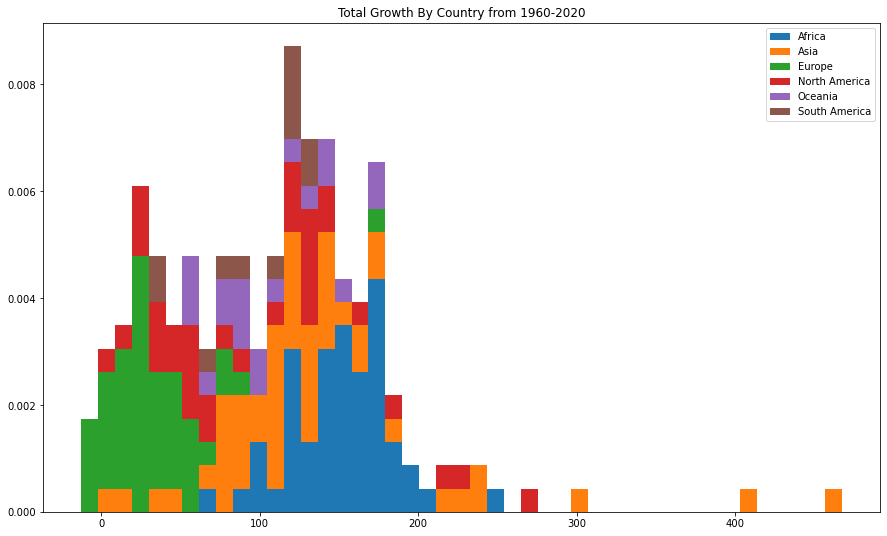

In [31]:
plt.hist([Afr['sum'], Asi['sum'], Eur['sum'], Nor['sum'], Oce['sum'], Sou['sum']], density = True, histtype = 'bar', bins = 45, label = ['Africa','Asia','Europe', 'North America', 'Oceania', 'South America'], stacked=True)
    
plt.legend(loc = "upper right")
plt.title('Total Growth By Country from 1960-2020')
plt.show()

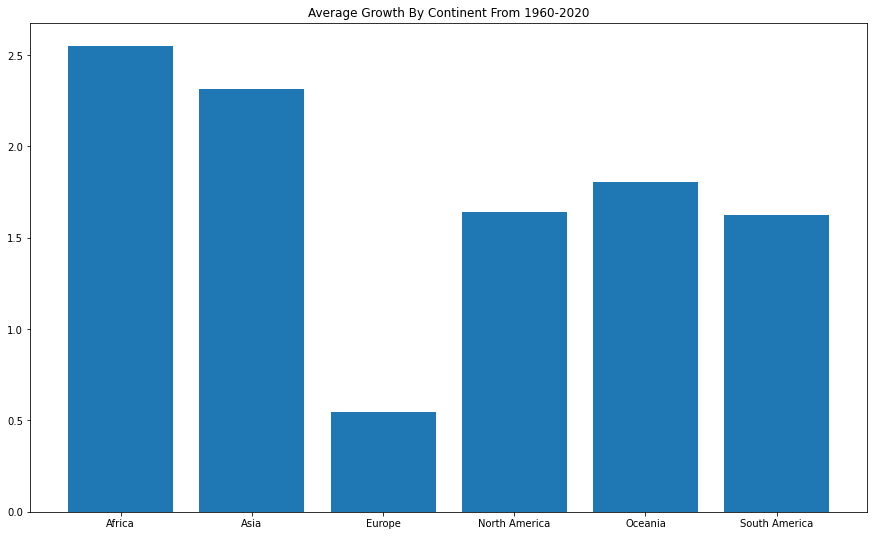

In [32]:
avgs_by_continent = pop_growth_avg.groupby('Continent_Name')['avg'].mean()
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

plt.bar(continents, avgs_by_continent)
plt.title('Average Growth By Continent From 1960-2020')
plt.show()

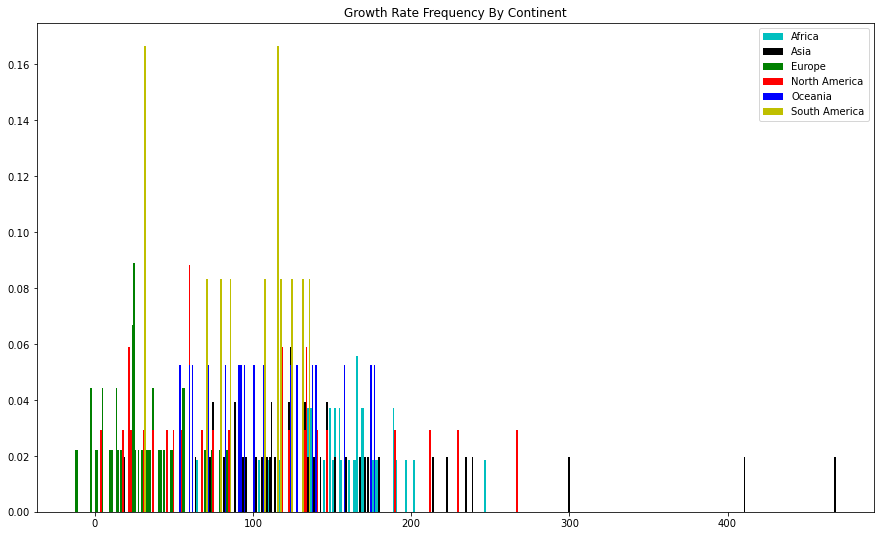

In [33]:
#Unsure if valid or useable, Aimed for Total Growth by Country Chat Above.

bins = np.arange(min(pop_growth_avg['sum']), max(pop_growth_avg['sum']) + 1, 1)

Afr = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Africa']
Asi = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Asia']
Eur = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Europe']
Nor = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'North America']
Oce = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'Oceania']
Sou = pop_growth_avg.loc[pop_growth_avg['Continent_Name'] == 'South America']

plt.hist(Afr['sum'], bins, density = 1, histtype = 'bar', label = 'Africa', color = 'c')
plt.hist(Asi['sum'], bins, density = 1, histtype = 'bar', label = 'Asia', color = 'k')
plt.hist(Eur['sum'], bins, density = 1, histtype = 'bar', label = 'Europe', color = 'g')
plt.hist(Nor['sum'], bins, density = 1, histtype = 'bar', label = 'North America', color = 'r')
plt.hist(Oce['sum'], bins, density = 1, histtype = 'bar', label = 'Oceania', color = 'b')
plt.hist(Sou['sum'], bins, density = 1, histtype = 'bar', label = 'South America', color = 'y')
    
plt.legend(loc="upper right")
plt.title('Growth Rate Frequency By Continent')
plt.show()

In [36]:
def meanByContinentByYear(data):
    data = pd.DataFrame(data.mean().to_dict(),index = [data.index.values[-1]])
    data = data.drop(columns=['Country_Number', 'sum', 'avg'])
    return data

In [57]:
ContinentalGrowthAvgByYear = meanByContinentByYear(Afr)

ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(meanByContinentByYear(Asi), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(meanByContinentByYear(Eur), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(meanByContinentByYear(Nor), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(meanByContinentByYear(Oce), ignore_index = True)
ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.append(meanByContinentByYear(Sou), ignore_index = True)

ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.drop(columns=['Continent_Code'])

ContinentalGrowthAvgByYear = ContinentalGrowthAvgByYear.transpose()

ContinentalGrowthAvgByYear.columns = continents

ContinentalGrowthAvgByYear.head(10)

,Africa,Asia,Europe,North America,Oceania,South America
[1961],2.260088,3.005375,1.256248,2.431787,2.716057,2.551628
[1962],2.283184,3.155407,1.261468,2.307620,2.907490,2.524440
[1963],2.323121,3.173248,1.236324,2.580545,2.860281,2.491922
[1964],2.384156,3.135930,1.211507,2.223503,2.854667,2.454482
[1965],2.456685,3.086733,1.127351,2.332202,2.731320,2.412118
[1966],2.539991,2.984446,1.055217,2.235208,2.674028,2.373900
[1967],2.609954,3.007229,1.014180,2.218967,2.542466,2.330654
[1968],2.639345,2.943475,0.953064,2.390938,2.435088,2.262818
[1969],2.620152,2.966672,0.878193,2.210469,2.448584,2.166728
[1970],2.575030,3.023316,0.823398,2.123652,2.562956,2.055237


<AxesSubplot:title={'center':'Growth Trends by Year Per Continent'}, xlabel='Year', ylabel='Growth Rate'>

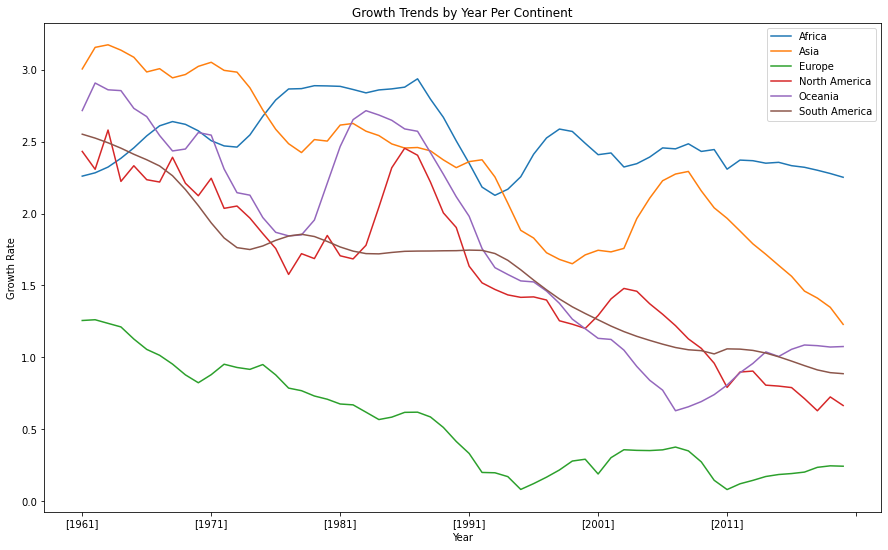

In [58]:
ContinentalGrowthAvgByYear.plot.line(xlabel = 'Year', ylabel = 'Growth Rate', title = 'Growth Trends by Year Per Continent')
